In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = (5, 5)

In [2]:
# data inlezen
nb = pd.read_csv('/home/jvdzwaan/data/dilipad/CAP/vragenuurtje_performance_nb.csv', encoding='utf-8', index_col=0)
svm = pd.read_csv('/home/jvdzwaan/data/dilipad/CAP/vragenuurtje_performance_svm.csv', encoding='utf-8', index_col=0)
parties = pd.read_csv('/home/jvdzwaan/data/dilipad/CAP/vragenuurtje_selected_parties/performance_tm.csv', encoding='utf-8', index_col=0)
parties_time = pd.read_csv('/home/jvdzwaan/data/dilipad/CAP/parties_through_time_vragenuurtje_results/performance_tm.csv', encoding='utf-8', index_col=0)

In [3]:
data = {'mean accuracy': [np.mean(nb['accuracy']), np.mean(svm['accuracy']), np.mean(parties['accuracy']), np.mean(parties_time['accuracy'])],
        'std accuracy': [np.std(nb['accuracy']), np.std(svm['accuracy']), np.std(parties['accuracy']), np.std(parties_time['accuracy'])],
        'mean F1': [np.mean(nb['F1']), np.mean(svm['F1']), np.mean(parties['F1']), np.mean(parties_time['F1'])],
        'std F1': [np.std(nb['F1']), np.std(svm['F1']), np.std(parties['F1']), np.std(parties_time['F1'])]}
df = pd.DataFrame(data, index=['naive bayes', 'svm', 'parties', 'parties time'])
df

,mean F1,mean accuracy,std F1,std accuracy
naive bayes,0.377031,0.447170,0.028250,0.026455
svm,0.585190,0.602689,0.032434,0.030172
parties,0.529297,0.537170,0.008285,0.008563
parties time,0.548317,0.550120,0.008439,0.007503


In [4]:
print np.round(df[['mean accuracy', 'std accuracy', 'mean F1', 'std F1']], decimals=3).to_latex()

\begin{tabular}{lrrrr}
\toprule
{} &  mean accuracy &  std accuracy &  mean F1 &  std F1 \\
\midrule
naive bayes  &          0.447 &         0.026 &    0.377 &   0.028 \\
svm          &          0.603 &         0.030 &    0.585 &   0.032 \\
parties      &          0.537 &         0.009 &    0.529 &   0.008 \\
parties time &          0.550 &         0.008 &    0.548 &   0.008 \\
\bottomrule
\end{tabular}



P value ANOVA: 0.0000000000

   Multiple Comparison of Means - Tukey HSD,FWER=0.05   
   group1       group2    meandiff  lower  upper  reject
--------------------------------------------------------
naive bayes    parties     0.1523   0.1219 0.1827  True 
naive bayes  parties_time  0.1713   0.1409 0.2017  True 
naive bayes      svm       0.2082   0.173  0.2433  True 
  parties    parties_time  0.019   -0.0058 0.0438 False 
  parties        svm       0.0559   0.0255 0.0863  True 
parties_time     svm       0.0369   0.0065 0.0673  True 
--------------------------------------------------------


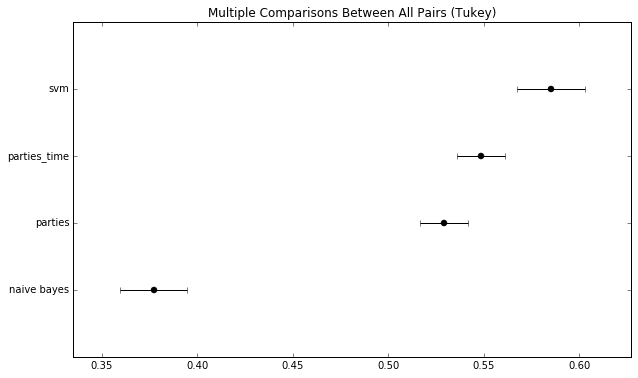

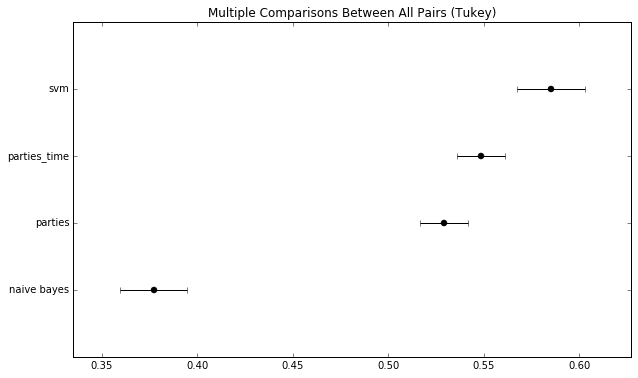

In [5]:
def do_anova(l1, l2, l3, l4, alpha=0.05): 
    f_val, p_val = stats.f_oneway(l1, l2, l3, l4)
    print "P value ANOVA: {:10.10f}\n".format(p_val)
    
    if p_val < 0.05:
        values = list(l1) + list(l2) + list(l3) + list(l4)
        #print values
        #print len(values)
        names = ['naive bayes' for i in range(len(l1))] + ['svm' for i in range(len(l2))] + ['parties' for i in range(len(l3))] + ['parties_time' for i in range(len(l4))]
        #print names
        #print len(names)
        result = sm.stats.multicomp.pairwise_tukeyhsd(np.array(values), names, alpha=alpha)
        print(result.summary())
        return result
result = do_anova(nb['F1'].values, svm['F1'].values, parties['F1'].values, parties_time['F1'].values)
result.plot_simultaneous()

P value ANOVA: 0.0000000000

   Multiple Comparison of Means - Tukey HSD,FWER=0.01   
   group1       group2    meandiff  lower  upper  reject
--------------------------------------------------------
naive bayes    parties     0.1523   0.1141 0.1904  True 
naive bayes  parties_time  0.1713   0.1332 0.2094  True 
naive bayes      svm       0.2082   0.1641 0.2522  True 
  parties    parties_time  0.019   -0.0121 0.0502 False 
  parties        svm       0.0559   0.0178 0.094   True 
parties_time     svm       0.0369  -0.0013 0.075  False 
--------------------------------------------------------


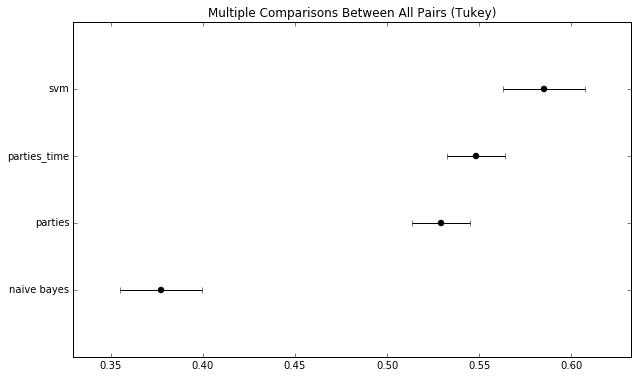

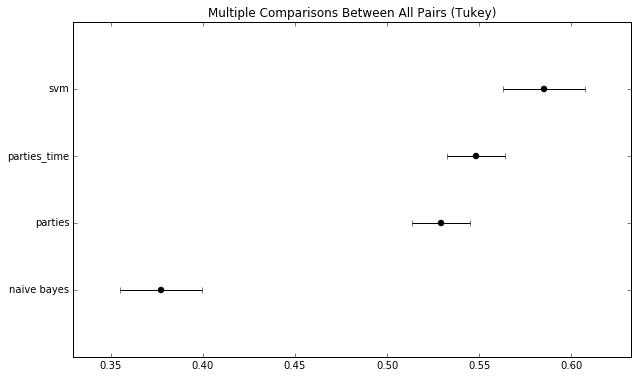

In [6]:
result = do_anova(nb['F1'].values, svm['F1'].values, parties['F1'].values, parties_time['F1'].values, alpha=0.01)
result.plot_simultaneous()

P value ANOVA: 0.0000000000

   Multiple Comparison of Means - Tukey HSD,FWER=0.05   
   group1       group2    meandiff  lower  upper  reject
--------------------------------------------------------
naive bayes    parties      0.09    0.0615 0.1185  True 
naive bayes  parties_time  0.1029   0.0745 0.1314  True 
naive bayes      svm       0.1555   0.1226 0.1884  True 
  parties    parties_time  0.0129  -0.0103 0.0362 False 
  parties        svm       0.0655   0.037  0.094   True 
parties_time     svm       0.0526   0.0241 0.0811  True 
--------------------------------------------------------


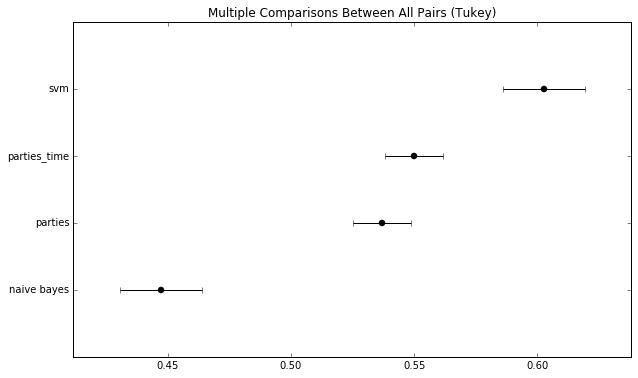

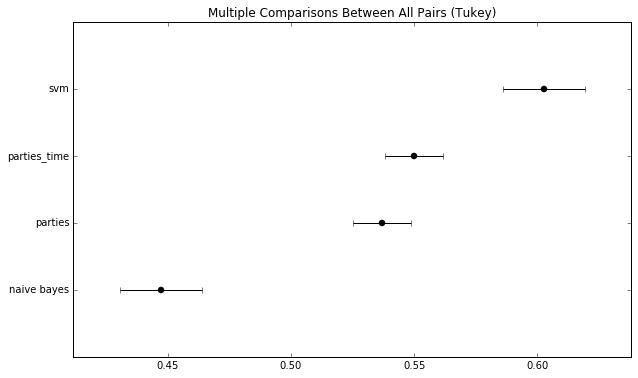

In [7]:
result = do_anova(nb['accuracy'].values, svm['accuracy'].values, parties['accuracy'].values, parties_time['accuracy'].values)
result.plot_simultaneous()

P value ANOVA: 0.0000000000

   Multiple Comparison of Means - Tukey HSD,FWER=0.01   
   group1       group2    meandiff  lower  upper  reject
--------------------------------------------------------
naive bayes    parties      0.09    0.0543 0.1257  True 
naive bayes  parties_time  0.1029   0.0672 0.1387  True 
naive bayes      svm       0.1555   0.1143 0.1968  True 
  parties    parties_time  0.0129  -0.0162 0.0421 False 
  parties        svm       0.0655   0.0298 0.1012  True 
parties_time     svm       0.0526   0.0168 0.0883  True 
--------------------------------------------------------


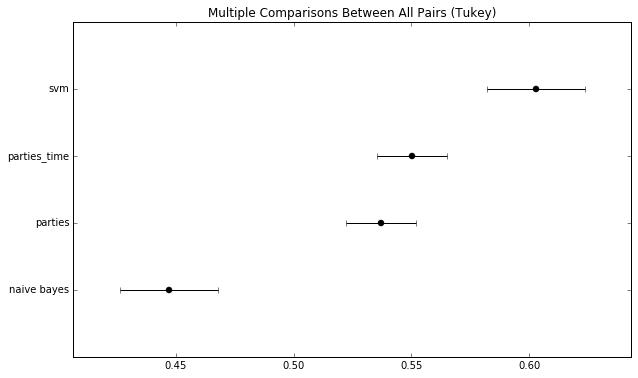

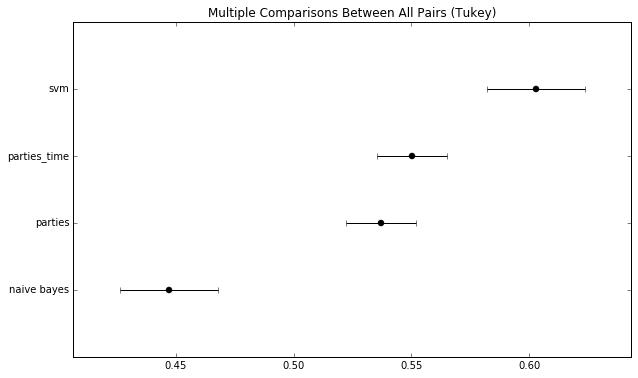

In [8]:
result = do_anova(nb['accuracy'].values, svm['accuracy'].values, parties['accuracy'].values, parties_time['accuracy'].values, alpha=0.01)
result.plot_simultaneous()

In [9]:
from scipy.stats import ttest_ind
from itertools import combinations

data = {'naive bayes': nb,
        'svm': svm,
        'parties': parties,
        'parties time': parties_time}

statistic = 'accuracy'
alpha = 0.05

for p1, p2 in combinations(data.keys(), 2):
    print p1, 'vs.', p2
    t, prob = ttest_ind(data[p1][statistic].values, data[p2][statistic].values, equal_var=False)
    if prob < alpha:
        print 'statistically significant; p < {}'.format(alpha)
    print

parties time vs. svm
statistically significant; p < 0.05

parties time vs. naive bayes
statistically significant; p < 0.05

parties time vs. parties
statistically significant; p < 0.05

svm vs. naive bayes
statistically significant; p < 0.05

svm vs. parties
statistically significant; p < 0.05

naive bayes vs. parties
statistically significant; p < 0.05

